In [1]:
import sklearn
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
ramka = pd.DataFrame(data.data, columns=data.feature_names)
ramka['Species'] = data.target_names[data.target]
ramka

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Wyświetlenie   rozmieszczenia   punktów   reprezentujących   próbki   kwiatów   dla   każdej   zmożliwych par cech.

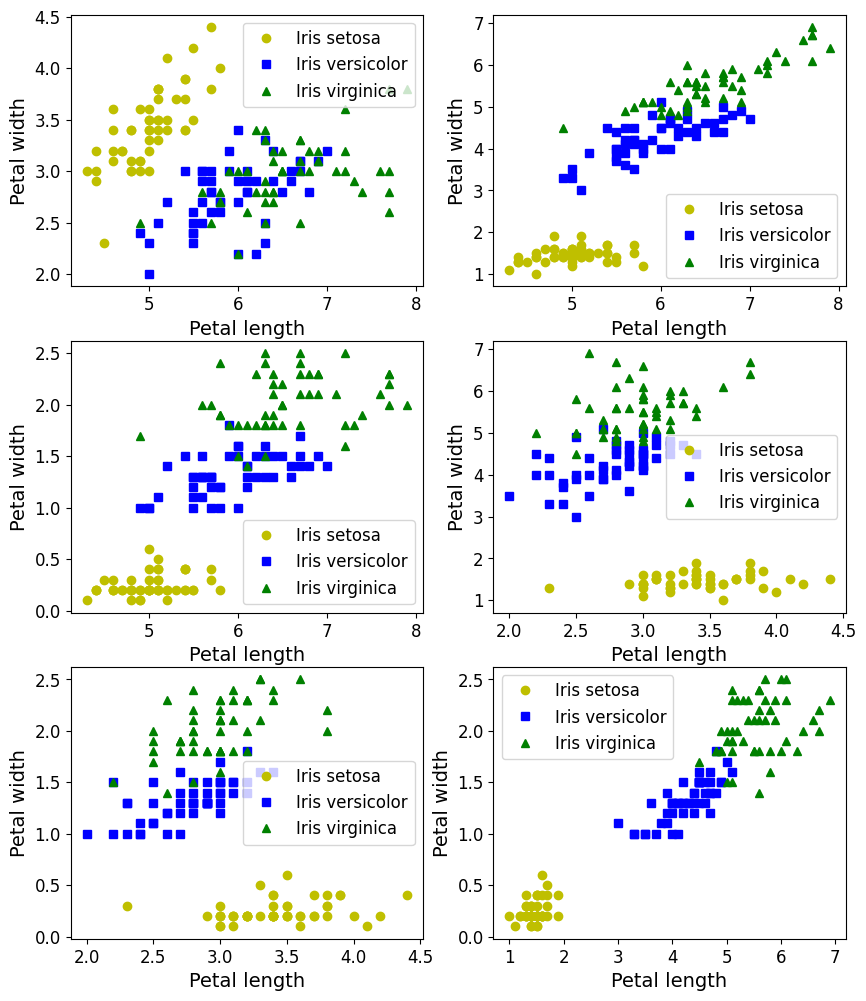

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

number_of_plots = 6
plt.figure(figsize=(10, 4*number_of_plots/2))

plot_counter = 1
for i in range (4-1):
    for j in range(1,4):
        if i < j:
            plt.subplot(int(number_of_plots/2),2,plot_counter)
            plt.plot(X[y==0, i], X[y==0, j], "yo", label="Iris setosa")
            plt.plot(X[y==1, i], X[y==1, j], "bs", label="Iris versicolor")
            plt.plot(X[y==2, i], X[y==2, j], "g^", label="Iris virginica")
            plt.xlabel("Petal length", fontsize=14)
            plt.ylabel("Petal width", fontsize=14)
            plt.legend(fontsize=12)
            plot_counter += 1

Na podstawie powyższysz wykresów można stwierdzić że grupowanie wygląda na najłtwiejsze dla par z 5 i 6 wykresu, ponieważ odległości tych samych obiektów nie są aż tak duże, natomiast najtrudniejsze jest dla par z 1 i 4 wykresu.

Grupowanie dla każdej pary cech za pomocą metody KMeans z modułu Scikit-Learn.

In [6]:
from sklearn.cluster import KMeans

In [7]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X[:,[2,3]])

In [8]:
import numpy as np

In [9]:
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

mapping

C:\Users\natal\AppData\Local\Temp\ipykernel_4708\1686138522.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(y_pred[y==class_id])


{1: 0, 2: 1, 0: 2}

In [10]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

In [11]:
np.sum(y !=y_pred)

6

In [12]:
np.sum(y_pred==y) / len(y_pred)

0.96

In [13]:
k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X[:,[1,2]]) 

mapping = {}

for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id
mapping

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

np.sum(y !=y_pred)

C:\Users\natal\AppData\Local\Temp\ipykernel_4708\1527787064.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(y_pred[y==class_id])


11

In [14]:
k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X[:,[1,3]]) 

mapping = {}

for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id
mapping

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

np.sum(y !=y_pred)

C:\Users\natal\AppData\Local\Temp\ipykernel_4708\4107201184.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(y_pred[y==class_id])


11

In [15]:
k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X[:,[0,3]]) 

mapping = {}

for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id
mapping

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

np.sum(y !=y_pred)

C:\Users\natal\AppData\Local\Temp\ipykernel_4708\4097735308.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(y_pred[y==class_id])


28

In [16]:
k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X[:,[0,2]]) 
y_pred

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id
mapping

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

np.sum(y !=y_pred)

C:\Users\natal\AppData\Local\Temp\ipykernel_4708\4175749585.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(y_pred[y==class_id])


18

In [17]:
k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X[:,[0,1]]) 

mapping = {}

for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id
mapping

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

np.sum(y !=y_pred)

C:\Users\natal\AppData\Local\Temp\ipykernel_4708\1547726412.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(y_pred[y==class_id])


27

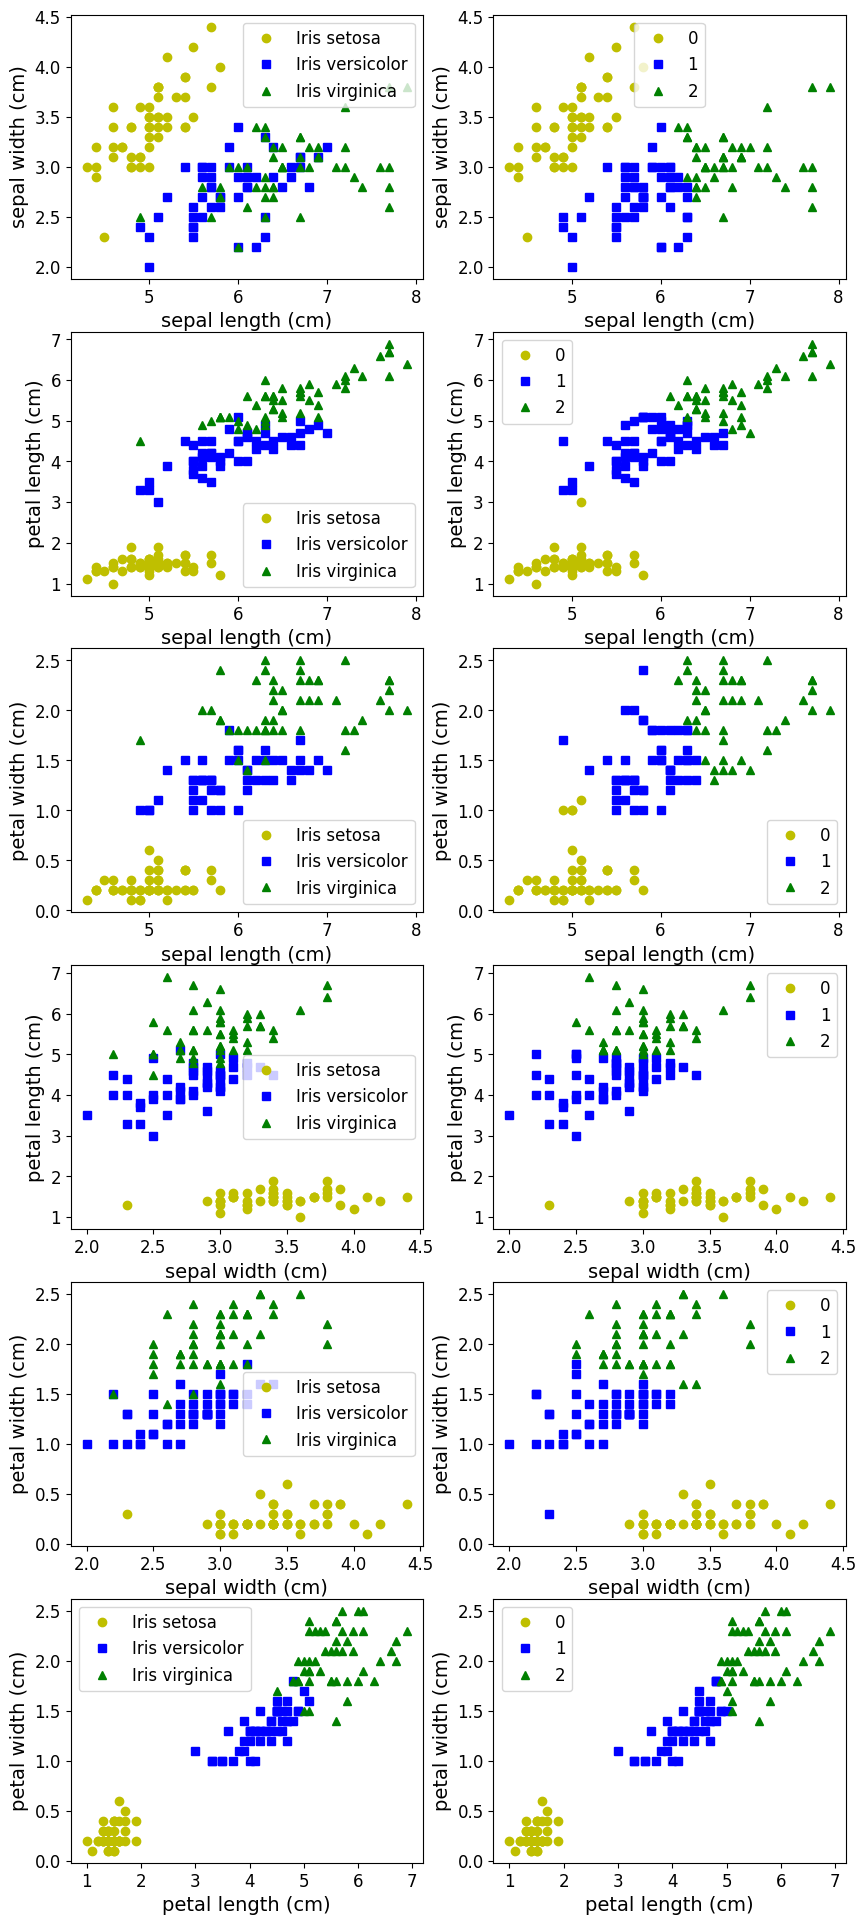

In [18]:
from sklearn.cluster import KMeans
from scipy import stats

k = 3 #liczba klastrów
kmeans = KMeans(n_clusters = k, random_state=42)

number_of_rows = 6
plot_counter = 1
plt.figure(figsize=(10, 4*number_of_plots))


for i in range (4-1):
    for j in range(1,4):
        if i < j:
            y_pred = kmeans.fit_predict(X[:,[i,j]])
            
            mapping = {}
            for class_id in np.unique(y):
                mode, _ = stats.mode(y_pred[y==class_id], keepdims=True)
                mapping[mode[0]] = class_id
                
            y_pred = np.array([mapping[l] for l in y_pred])
            
                
            plt.subplot(number_of_plots,2,plot_counter)
            plt.plot(X[y==0, i], X[y==0, j], "yo", label="Iris setosa")
            plt.plot(X[y==1, i], X[y==1, j], "bs", label="Iris versicolor")
            plt.plot(X[y==2, i], X[y==2, j], "g^", label="Iris virginica")
            plt.xlabel(data.feature_names[i], fontsize=14)
            plt.ylabel(data.feature_names[j], fontsize=14)
            plt.legend(fontsize=12)
            plot_counter += 1        
                
            plt.subplot(number_of_plots,2,plot_counter)
            plt.plot(X[y_pred==0, i], X[y_pred==0, j], "yo", label="0")
            plt.plot(X[y_pred==1, i], X[y_pred==1, j], "bs", label="1")
            plt.plot(X[y_pred==2, i], X[y_pred==2, j], "g^", label="2")
            plt.xlabel(data.feature_names[i], fontsize=14)
            plt.ylabel(data.feature_names[j], fontsize=14)
            plt.legend(fontsize=12)
            plot_counter += 1          

Sprawdam, czy w przypadku wykorzystania wszystkich cech do grupowania, liczba punktów przypisanych do „właściwego” klastra będzie większa niż dla którejkolwiek pary cech.

In [19]:
y_pred = kmeans.fit_predict(X)
mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id], keepdims=True)
    mapping[mode[0]] = class_id
    
y_pred = np.array([mapping[l] for l in y_pred])
print(f'Dla wszytkich cech liczba "niewłaściwych" = {np.sum(data.target - y_pred)}')

Dla wszytkich cech liczba "niewłaściwych" = 12


Diagram Woronoja dla „najlepszej” pary cech.

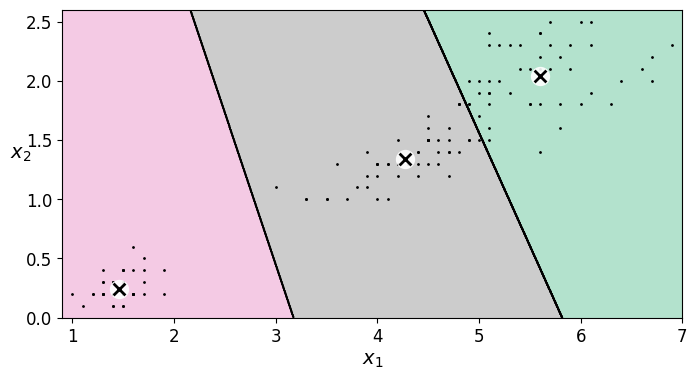

In [20]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
y_pred = kmeans.fit_predict(X[:,[2,3]])
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X[:,[2,3]])
plt.show()

Diagram Woronojadla „najgorszej” pary cech.

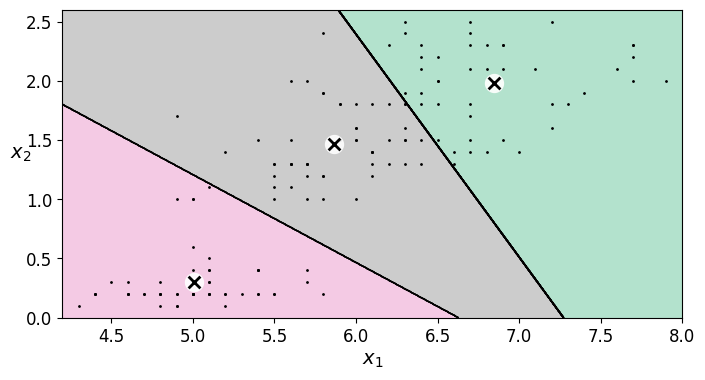

In [21]:
y_pred = kmeans.fit_predict(X[:,[0,3]])
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X[:,[0,3]])
plt.show()

Dla „najlepszej” pary cech wykonaj wykres ilustrujący stan algorytmu k-średnich w pierwszych kilku iteracjach.

In [22]:
kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X[:,[2,3]])
kmeans_iter2.fit(X[:,[2,3]])
kmeans_iter3.fit(X[:,[2,3]])

C:\Users\natal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\natal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\natal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', max_iter=3, n_clusters=3, n_init=1,
       random_state=0)

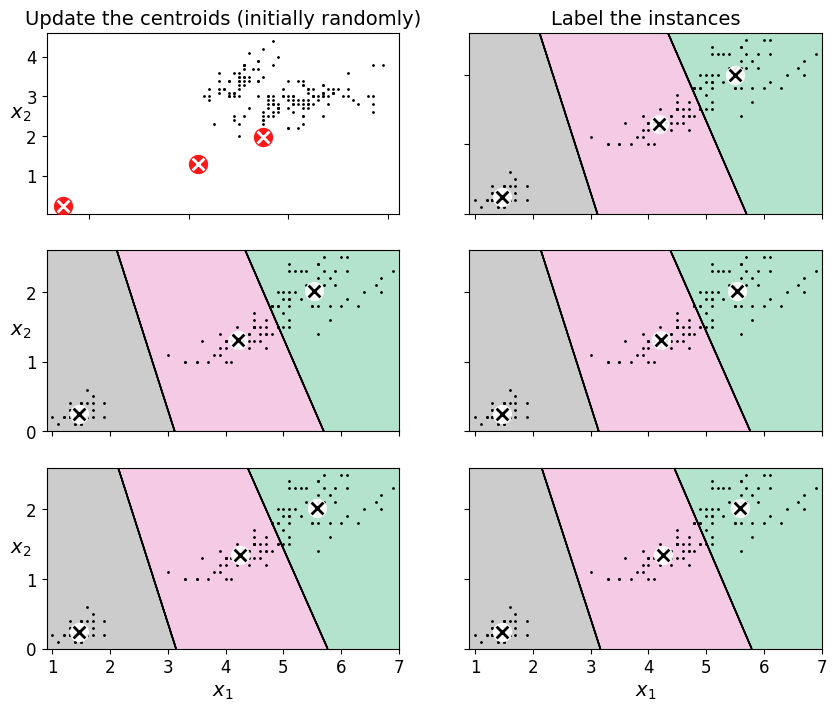

In [23]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X[:,[2,3]], show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X[:,[2,3]], show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X[:,[2,3]], show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X[:,[2,3]], show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X[:,[2,3]], show_ylabels=False)

plt.show()

Wykres inercji w zależności od liczby klastrów, np., od 1 do 10 klastrów dla dowolnej pary cech. 

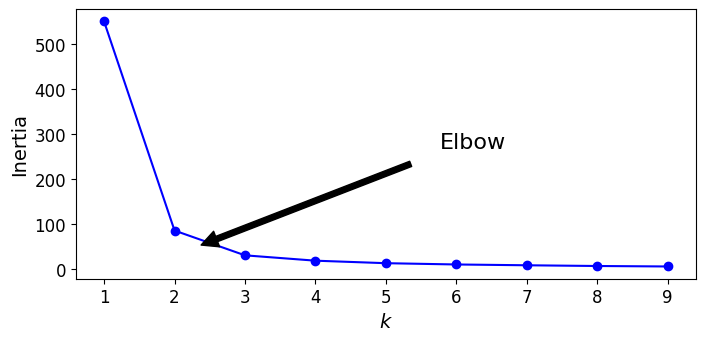

In [24]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X[:, (3,2)])
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
#plt.axis([1, 8.5, 0, 1300])
plt.show()

Wykres wyniku profilu analogicznie do punktu 14. Czy najwyższy wynik profilu występuje na wykresie dla liczby klastrów równej liczbie gatunków kwiatów?

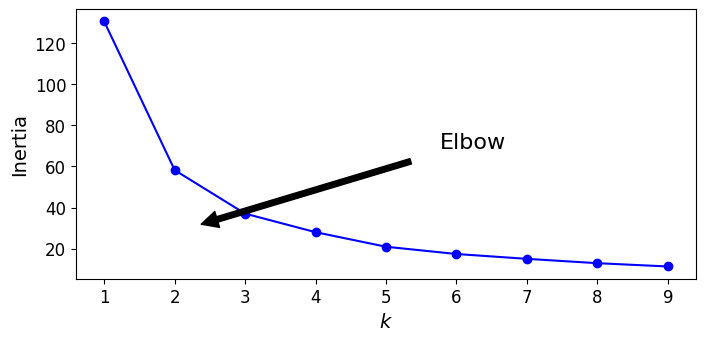

In [25]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X[:, (0,1)])
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
#plt.axis([1, 8.5, 0, 1300])
plt.show()

In [26]:
from sklearn.datasets import make_blobs

In [27]:
blob_centers = np.array(
    [[ -10,  30],
     [ -20,  2],
     [ 0,  5],
     [ 20, 40],
     [30,  10]])
blob_std = np.array([5, 4, 1, 3, 10])

In [28]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=42)

In [29]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

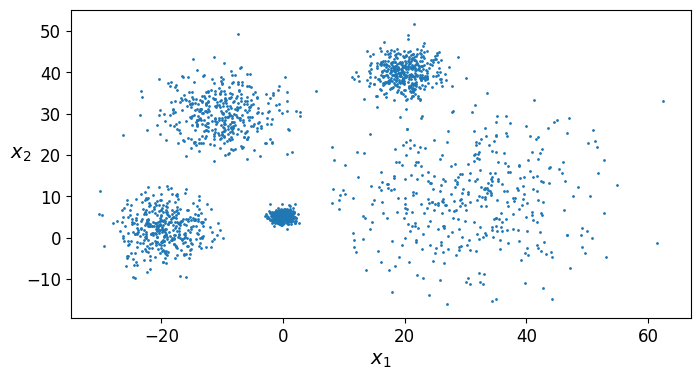

In [30]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

„Łokieć” na wykresie inercji oraz najwyższy wynik profilu dla liczby klastrów 1-12 dla grupowania algorytmem Kmeans.

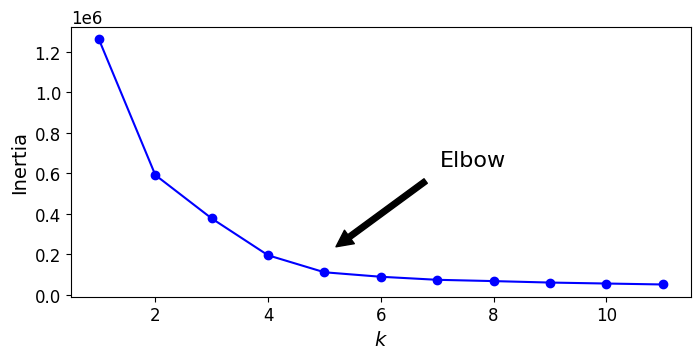

In [31]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 12)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 12), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(5, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [32]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
kmeans.cluster_centers_

array([[ 20.22882066,  39.36070244],
       [  1.05463269,   5.17643367],
       [-10.14776596,  30.04439543],
       [ 32.79507032,   8.80324174],
       [-19.56313044,   2.26290917]])

In [33]:
kmeans.labels_

array([0, 2, 4, ..., 2, 0, 1])

Wykres profilu i diagram Woronoja dla najlepszej liczby klastrów

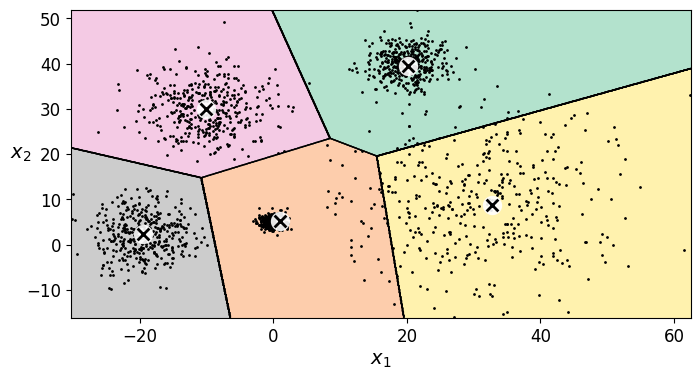

In [34]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X,show_centroids=False)
plot_centroids(kmeans.cluster_centers_)
plt.show()

Wykresy dla kilku pierwszych iteracji algorytmu grupowania dla wybranej liczby klastrów,

In [35]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

C:\Users\natal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\natal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\natal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

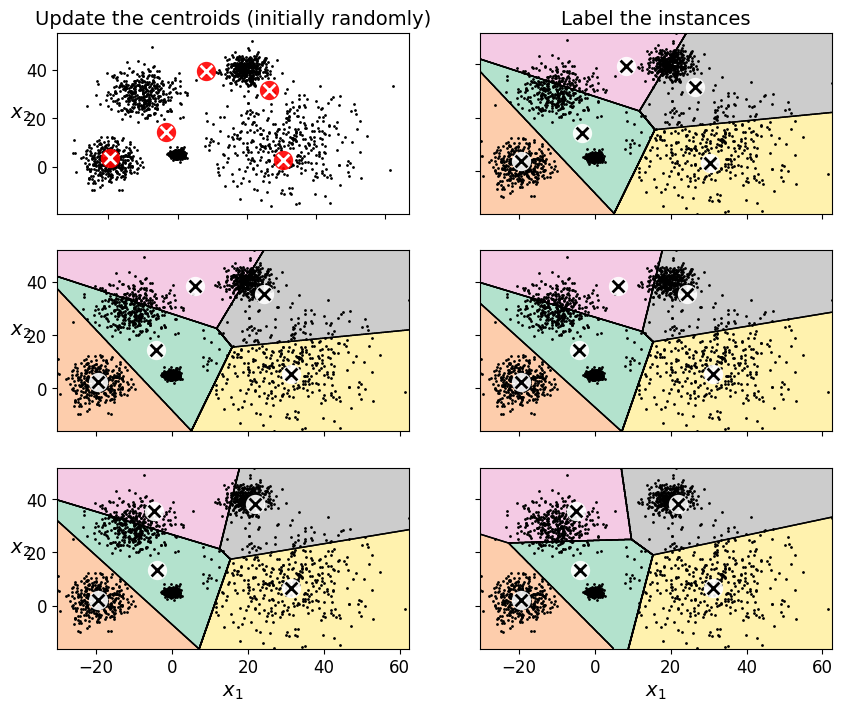

In [36]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()